## import library and load data

In [317]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
file_path = "C:/Users/User/OneDrive/桌面/統諮期末/Sleep_health_and_lifestyle_dataset.csv"
data = pd.read_csv(file_path) 

In [270]:
#visualization
import seaborn as sns 
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.figure_factory as ff
#Data spliting
from sklearn.model_selection import train_test_split

## EDA

In [272]:
data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [274]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [275]:
data.shape

(374, 13)

In [276]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [277]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [278]:
columns = [column for column in data.columns if column!='Person ID']
for column in columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Age': [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Unique values in 'Occupation': ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in 'Sleep Duration': [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Unique values in 'Quality of Sleep': [6 4 7 5 8 9]
Unique values in 'Physical Activity Level': [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Unique values in 'Stress Level': [6 8 7 4 3 5]
Unique values in 'BMI Category': ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique values in 'Blood Pressure': ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95

In [319]:
# 刪除 Person ID
data = data.drop(columns=["Person ID"])

# 把 blood pressure 分成兩個欄位
data[["BloodPressure_Upper", "BloodPressure_Lower"]] = data["Blood Pressure"].str.split("/", expand=True).astype(float)

# 分類 Physical Activity Level
data["Physical Activity Level"] = pd.cut(
    data["Physical Activity Level"],
    bins=[-float("inf"), 35, 45, 60, 75, 90],
    labels=["<=35", "<=45", "<=60", "<=75", "<=90"]
)

# 分類 Daily Steps
data["Daily Steps"] = pd.cut(
    data["Daily Steps"],
    bins=[-float("inf"), 5000, 6000, 7000, float("inf")],
    labels=["<=5000", "<=6000", "<=7000", "7000up"]
)

# 將睡眠疾病轉換為 0 和 1
data["Sleep Disorder"] = data["Sleep Disorder"].apply(lambda x: 0 if pd.isna(x) else 1)

# 分類 BMI
data["BMI Category"] = data["BMI Category"].replace({
    "Normal Weight": "Normal",
    "Obese": "Overweight"
})

# 分類 Quality of Sleep
data["Quality of Sleep"] = data["Quality of Sleep"].apply(lambda x: "4-5" if x in [4, 5] else x)

# 分類 Occupation
data["Occupation"] = data["Occupation"].replace({
    "Manager": "Salesperson",
    "Sales Representative": "Salesperson",
    "Software Engineer": "Engineer"
})
# 刪除 Bloodpressure
data = data.drop(columns=["Blood Pressure"])

In [280]:
data['Sleep Disorder'] = data['Sleep Disorder'].astype("category")

In [321]:
#for colored text output ( Text ,Text colors ,Text highlights , Attributes)
number_of_values=colored(data.nunique(), "magenta",None, attrs=["blink"])
                        
print(number_of_values) #for number of values of columns

Gender                      2
Age                        31
Occupation                  8
Sleep Duration             27
Quality of Sleep            5
Physical Activity Level     5
Stress Level                6
BMI Category                2
Heart Rate                 19
Daily Steps                 4
Sleep Disorder              2
BloodPressure_Upper        18
BloodPressure_Lower        17
dtype: int64


In [323]:
data.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,BloodPressure_Lower
0,Male,27,Engineer,6.1,6,<=45,6,Overweight,77,<=5000,0,126.0,83.0
1,Male,28,Doctor,6.2,6,<=60,8,Normal,75,7000up,0,125.0,80.0
2,Male,28,Doctor,6.2,6,<=60,8,Normal,75,7000up,0,125.0,80.0
3,Male,28,Salesperson,5.9,4-5,<=35,8,Overweight,85,<=5000,1,140.0,90.0
4,Male,28,Salesperson,5.9,4-5,<=35,8,Overweight,85,<=5000,1,140.0,90.0
5,Male,28,Engineer,5.9,4-5,<=35,8,Overweight,85,<=5000,1,140.0,90.0
6,Male,29,Teacher,6.3,6,<=45,7,Overweight,82,<=5000,1,140.0,90.0
7,Male,29,Doctor,7.8,7,<=75,6,Normal,70,7000up,0,120.0,80.0
8,Male,29,Doctor,7.8,7,<=75,6,Normal,70,7000up,0,120.0,80.0
9,Male,29,Doctor,7.8,7,<=75,6,Normal,70,7000up,0,120.0,80.0


In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int32  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int32  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int32  
 5   Physical Activity Level  374 non-null    int32  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int32  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int32  
 10  Sleep Disorder           374 non-null    int32  
 11  BloodPressure_Upper      374 non-null    float64
 12  BloodPressure_Lower      374 non-null    float64
dtypes: float64(3), int32(7), int64(3)
memory usage: 27.9 KB


In [285]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
0    219
1    155
Name: count, dtype: int64

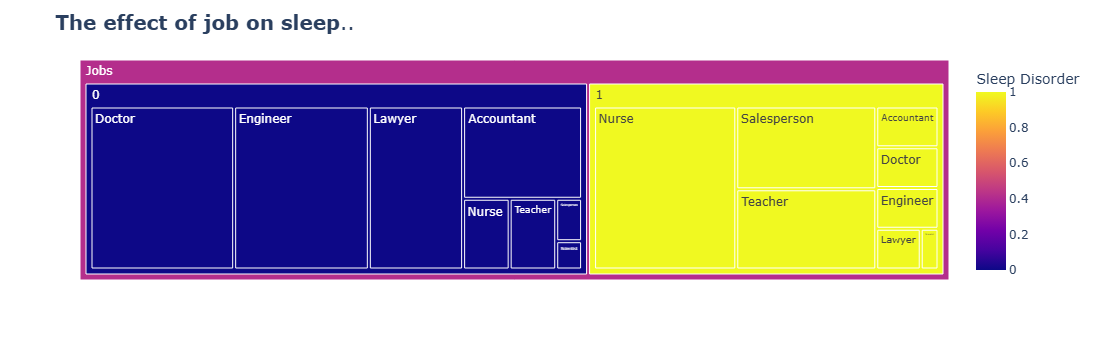

In [325]:
fig=px.treemap(data,path=[px.Constant('Jobs'),'Sleep Disorder','Occupation'],
               color='Sleep Disorder',
              color_discrete_sequence=['#EBDEF0','#C39BD3','#4A235A'])

fig.update_layout(title='<b>The effect of job on sleep</b>..',
                 title_font={'size':20})

fig.show()

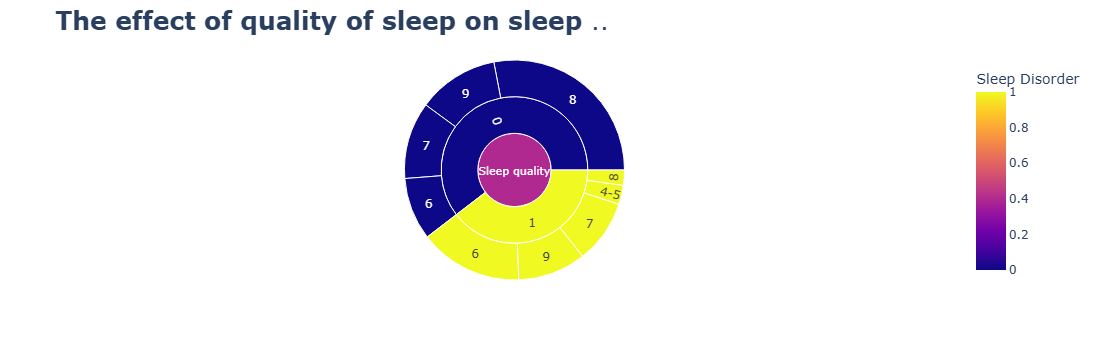

In [335]:
fig=px.sunburst(data,path=[px.Constant('Sleep quality'),'Sleep Disorder','Quality of Sleep'],
               color='Sleep Disorder',values='Sleep Duration',
              hover_data=['Gender'])

fig.update_layout(title='<b>The effect of quality of sleep on sleep </b>..',
                 title_font={'size':25})

fig.show()

C:\Users\User\anaconda3\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



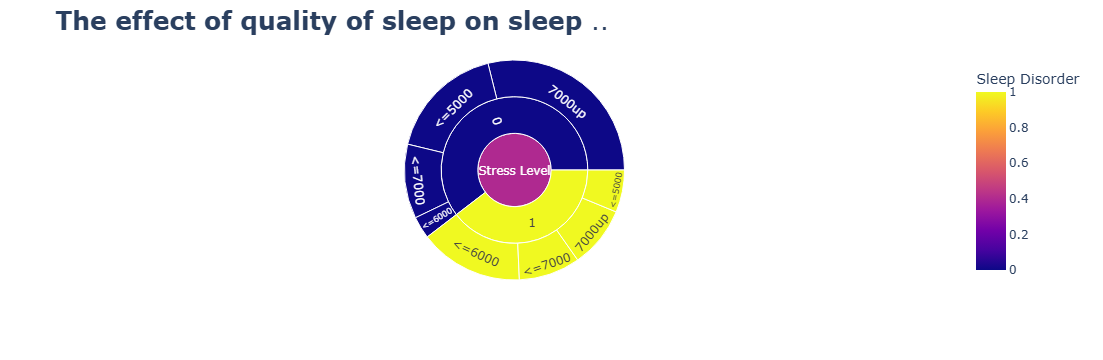

In [393]:
fig=px.sunburst(data,path=[px.Constant('Stress Level'),'Sleep Disorder','Daily Steps'],
               color='Sleep Disorder',values='Sleep Duration')

fig.update_layout(title='<b>The effect of quality of sleep on sleep </b>..',
                 title_font={'size':25})

fig.show()

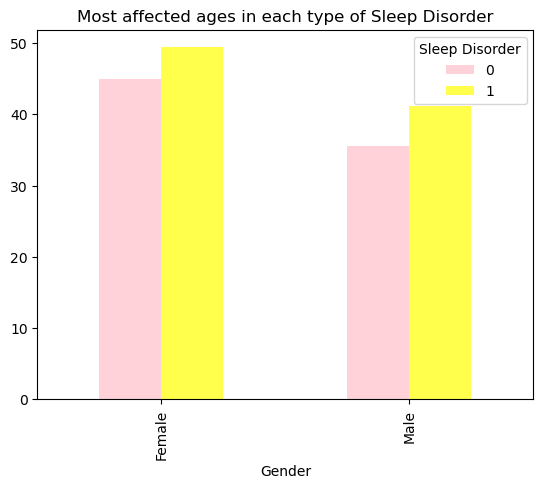

In [341]:
data.pivot_table(index='Gender',columns='Sleep Disorder',values='Age',aggfunc='mean').plot(kind='bar',color={'yellow','pink'},
                                                                                                   title='Most affected ages in each type of Sleep Disorder',
                                                                                                    label='Age',alpha=.7)
plt.show()

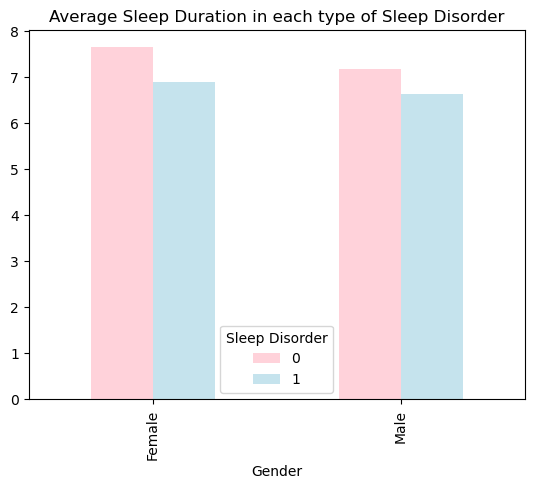

In [387]:
data.pivot_table(index='Gender',columns='Sleep Disorder',values='Sleep Duration',aggfunc='mean').plot(kind='bar',color={'lightblue','pink'},
                                                                                                   title='Average Sleep Duration in each type of Sleep Disorder',
                                                                                                    label='Age',alpha=.7)
plt.show()

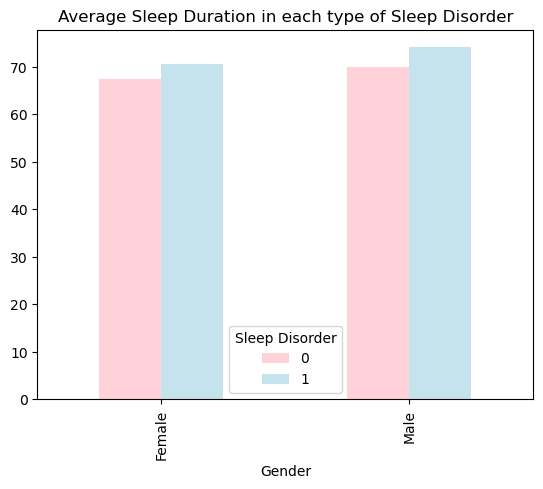

In [395]:
data.pivot_table(index='Gender',columns='Sleep Disorder',values='Heart Rate',aggfunc='mean').plot(kind='bar',color={'lightblue','pink'},
                                                                                                   title='Average Heart Rate in each type of Sleep Disorder',
                                                                                                    label='Age',alpha=.7)
plt.show()

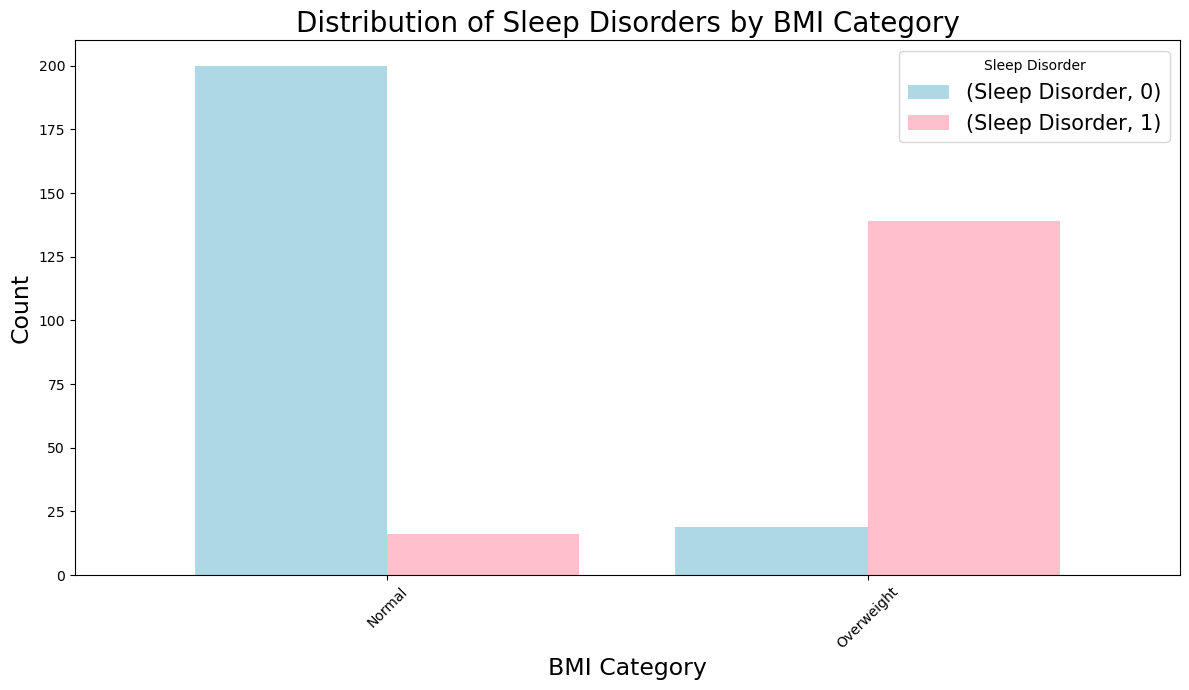

In [363]:
# Pivot table to aggregate the data
pivot_data = data.pivot_table(
    index='BMI Category',
    columns='Sleep Disorder',
    aggfunc={'Sleep Disorder': 'count'}
)
# Plot a bar chart
pivot_data.plot.bar(
    figsize=(12, 7), 
    color=['lightblue','pink'], 
    width=0.8
)
# Add labels and title
plt.title('Distribution of Sleep Disorders by BMI Category', fontsize=20)
plt.ylabel('Count', fontsize=17)
plt.xlabel('BMI Category', fontsize=17)
plt.legend(title='Sleep Disorder', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [397]:
categorical_columns = data.select_dtypes(include=["object", "category"]).columns

# 初始化 LabelEncoder
label_encoders = {}

# 對每個類別型欄位進行編碼
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # 確保所有值轉為字串處理
    label_encoders[col] = le  # 儲存編碼器以供後續解碼使用

# 檢查結果
print("經過 Label Encoding 的資料：")
print(data.head())

print("\n各欄位的編碼對應：")
for col, le in label_encoders.items():
    print(f"{col}: {list(le.classes_)}")

經過 Label Encoding 的資料：
   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           2             6.1                 1   
1       1   28           1             6.2                 1   
2       1   28           1             6.2                 1   
3       1   28           5             5.9                 0   
4       1   28           5             5.9                 0   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                        1             6             1          77   
1                        2             8             0          75   
2                        2             8             0          75   
3                        0             8             1          85   
4                        0             8             1          85   

   Daily Steps  Sleep Disorder  BloodPressure_Upper  BloodPressure_Lower  
0            1               0                126.0                 83.0  
1            0       

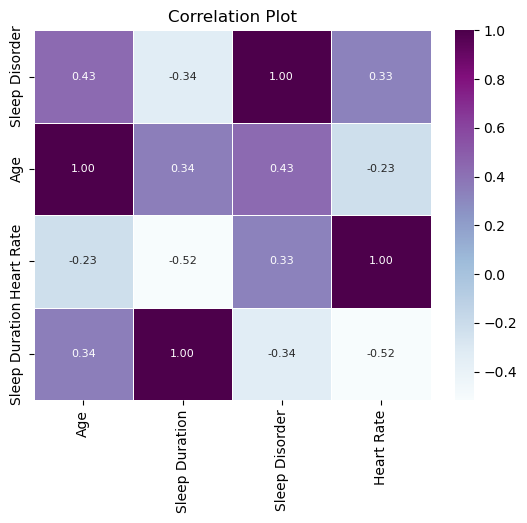

In [401]:
correlation=data[["Age","Sleep Duration","Sleep Disorder","Heart Rate"]].corr()
max_6_corr=correlation.nlargest(6,"Sleep Disorder")
sns.heatmap(max_6_corr,annot=True,fmt=".2F",annot_kws={"size":8},linewidths=0.5,cmap='BuPu')
plt.title('Correlation Plot')
plt.show()

In [292]:
def plotly_boxplot(df , numeric_types , color  , row = None) :
    def gather( df, key, value, cols ):
        id_vars = [ col for col in df.columns if col not in cols ]
        id_values = cols
        var_name = key
        value_name = value
        return pd.melt( df, id_vars, id_values, var_name, value_name )
    numeric_gather = gather( df , 'key', 'value', numeric_types )
    fig = px.box(numeric_gather, x="key", y="value",
                 facet_col="key" ,color = color , 
                 facet_row=row )
    fig.update_yaxes(showticklabels=True , matches=None)
    fig.update_xaxes(showticklabels=True , matches=None)
    fig.show()

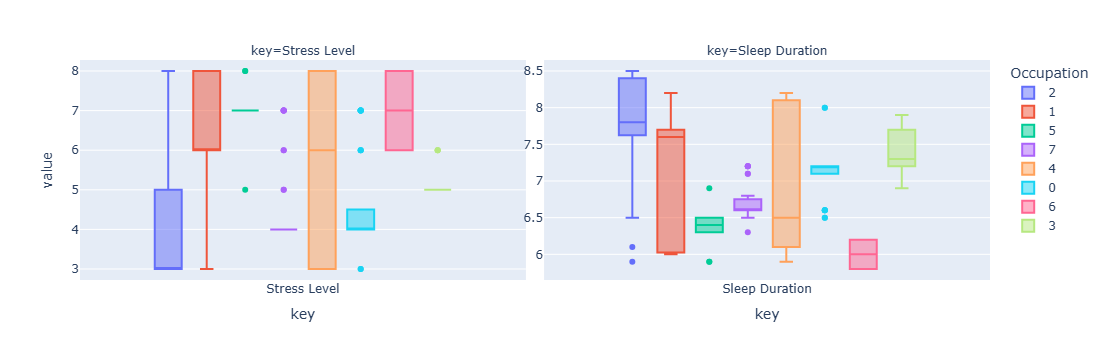

In [293]:
plotly_boxplot(data, ["Stress Level", "Sleep Duration"], "Occupation")

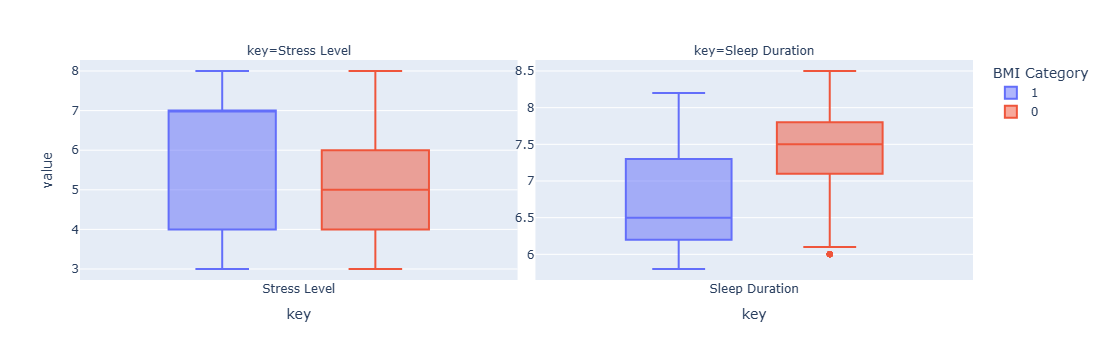

In [294]:
plotly_boxplot(data, ["Stress Level", "Sleep Duration"], "BMI Category")

## analysis - split

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import accuracy_score
import plotly.express as px

In [297]:
# Prepare the data
X = data.drop(['Sleep Disorder'], axis=1)
y = data['Sleep Disorder']
print(X.shape)
print(y.shape)
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
print("x train dimensions :",X_train.shape)
print("x test dimensions: ",X_test.shape)
print("y train dimensions :",y_train.shape)
print("y test dimensions :",y_test.shape)

(374, 12)
(374,)
x train dimensions : (280, 12)
x test dimensions:  (94, 12)
y train dimensions : (280,)
y test dimensions : (94,)


## logistic

In [299]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [300]:
lr_pred_d = log_reg.predict(X_test)
print(f"Accuracy: {log_reg.score(X_test, y_test):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_pred_d))
print(classification_report(y_test, lr_pred_d))

Accuracy: 0.93

Confusion Matrix:
 [[53  2]
 [ 5 34]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        55
           1       0.94      0.87      0.91        39

    accuracy                           0.93        94
   macro avg       0.93      0.92      0.92        94
weighted avg       0.93      0.93      0.93        94



## random forest

In [302]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred_class = rf.predict(X_test)

In [303]:
accuracy = accuracy_score(y_test, rf_pred_class)
conf_matrix = confusion_matrix(y_test, rf_pred_class)
class_report = classification_report(y_test, rf_pred_class)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 95.74%

Confusion Matrix:
 [[55  0]
 [ 4 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        55
           1       1.00      0.90      0.95        39

    accuracy                           0.96        94
   macro avg       0.97      0.95      0.96        94
weighted avg       0.96      0.96      0.96        94



### CatBoost

In [305]:
from catboost import CatBoostClassifier
# Specify categorical columns (by their names)
# Initialize the CatBoostClassifier with categorical features
CBC = CatBoostClassifier()

# Train the model
CBC.fit(X_train, y_train)

Learning rate set to 0.005982
0:	learn: 0.6851588	total: 2.67ms	remaining: 2.67s
1:	learn: 0.6783044	total: 7.97ms	remaining: 3.98s
2:	learn: 0.6710813	total: 10.3ms	remaining: 3.43s
3:	learn: 0.6648436	total: 14.4ms	remaining: 3.59s
4:	learn: 0.6581681	total: 18.3ms	remaining: 3.65s
5:	learn: 0.6519517	total: 22.7ms	remaining: 3.76s
6:	learn: 0.6453251	total: 26.7ms	remaining: 3.79s
7:	learn: 0.6387653	total: 30.5ms	remaining: 3.78s
8:	learn: 0.6325556	total: 33.2ms	remaining: 3.65s
9:	learn: 0.6260596	total: 37.4ms	remaining: 3.71s
10:	learn: 0.6214524	total: 41.3ms	remaining: 3.71s
11:	learn: 0.6151223	total: 45.2ms	remaining: 3.72s
12:	learn: 0.6099060	total: 48.7ms	remaining: 3.69s
13:	learn: 0.6039127	total: 52.9ms	remaining: 3.73s
14:	learn: 0.5985144	total: 56.4ms	remaining: 3.71s
15:	learn: 0.5938704	total: 60ms	remaining: 3.69s
16:	learn: 0.5882715	total: 63.1ms	remaining: 3.65s
17:	learn: 0.5820345	total: 67ms	remaining: 3.65s
18:	learn: 0.5771275	total: 70.8ms	remaining: 3.

In [306]:
CBC_training_score=colored(round(CBC.score(X_train,y_train)*100,2), "magenta",None, attrs=["blink"])
CBC_testing_score=colored(round(CBC.score(X_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("CBC training score :",CBC_training_score)
print("CBC testing score :",CBC_testing_score)

CBC training score : 93.93
CBC testing score : 95.74


In [307]:
CBC_y_pred=CBC.predict(X_test)

accuracy = accuracy_score(y_test, CBC_y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, CBC_y_pred))
print("\nClassification Report:\n", classification_report(y_test, CBC_y_pred))

Accuracy: 95.74%

Confusion Matrix:
 [[55  0]
 [ 4 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        55
           1       1.00      0.90      0.95        39

    accuracy                           0.96        94
   macro avg       0.97      0.95      0.96        94
weighted avg       0.96      0.96      0.96        94



## gradient boost

In [309]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier().fit(X_train,y_train)

In [310]:
GBC_training_score=colored(round(GBC.score(X_train,y_train)*100,2), "magenta",None, attrs=["blink"])
GBC_testing_score=colored(round(GBC.score(X_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("GBC training score :",GBC_training_score)
print("GBC testing score :",GBC_testing_score)

GBC training score : 93.93
GBC testing score : 95.74


In [311]:
GBC_y_pred=GBC.predict(X_test)
accuracy = accuracy_score(y_test, GBC_y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, GBC_y_pred))
print("\nClassification Report:\n", classification_report(y_test, GBC_y_pred))

Accuracy: 95.74%

Confusion Matrix:
 [[55  0]
 [ 4 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        55
           1       1.00      0.90      0.95        39

    accuracy                           0.96        94
   macro avg       0.97      0.95      0.96        94
weighted avg       0.96      0.96      0.96        94



## xgboost

In [313]:
model = xgb.XGBClassifier(
    use_label_encoder=False,
    # 禁用舊版的 Label Encoding
    eval_metric="logloss",    # 選擇評估指標
    n_estimators=100,         # 樹的數量
    max_depth=6,              # 樹的深度
    learning_rate=0.1,        # 學習率
    subsample=0.8,            # 子樣本比例
    colsample_bytree=0.8      # 特徵子集比例
)

# 使用訓練資料訓練模型
model.fit(X_train, y_train)
# 預測
y_pred_xgb = model.predict(X_test)

C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[15:58:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [314]:
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 95.74%

Confusion Matrix:
 [[55  0]
 [ 4 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        55
           1       1.00      0.90      0.95        39

    accuracy                           0.96        94
   macro avg       0.97      0.95      0.96        94
weighted avg       0.96      0.96      0.96        94



### confusion matrix

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U8'), dtype('int32')) -> None

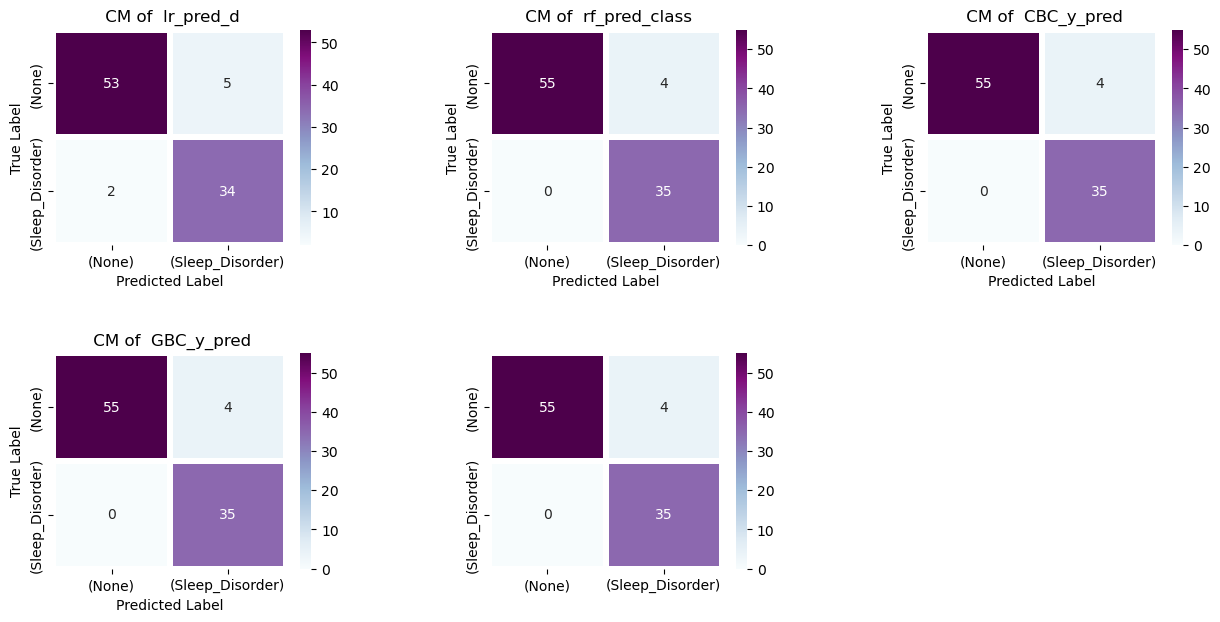

In [316]:
models_predictions=[lr_pred_d,rf_pred_class,CBC_y_pred,GBC_y_pred,y_pred_xgb]
model={1:'lr_pred_d',2:'rf_pred_class',3:'CBC_y_pred',4:'GBC_y_pred',5:y_pred_xgb}


plt.figure(figsize=(15,7))
for i,y_pred in enumerate(models_predictions,1) :
    
    cm = confusion_matrix(y_pred,y_test)
    
    plt.subplot(2,3,i)
    sns.heatmap(cm,cmap='BuPu',linewidth=3,fmt='',annot=True,
                xticklabels=['(None)','(Sleep_Disorder)'],
                yticklabels=['(None)','(Sleep_Disorder)'])
    
    
    plt.title(' CM of  '+ model[i])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)

### intepretation

In [ ]:
import shap

shap_values = shap.TreeExplainer(GBC).shap_values(X_test)
shap.summary_plot(shap_values, X_test,class_names=['0','1'])

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_pred_d)
rf_accuracy = accuracy_score(y_test, rf_pred_class)
cbc_accuracy = accuracy_score(y_test, CBC_y_pred)
gbc_accuracy = accuracy_score(y_test, GBC_y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

accuracy_scores = [lr_accuracy,rf_accuracy,cbc_accuracy,gbc_accuracy,xgb_accuracy] 
print(accuracy_scores)
    
fig = px.bar(x=['Logistic Regression','Random Forest','Catboost','Gradient Boosting','XGB'], y=accuracy_scores)
fig.show()